# Use predictive analysis to diagnose Breast Cancer tumours 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
cancer_data = load_breast_cancer()
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
cancer_data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [4]:
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
len(cancer_data['feature_names'])

30

In [7]:
cancer_df = pd.DataFrame(data = cancer_data['data'], columns=cancer_data['feature_names'])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
cancer_df['target'] = cancer_data['target']
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


The “info()” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

In [9]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [10]:
cancer_df.shape

(569, 31)

In [11]:
cancer_df.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
target    

In [12]:
cancer_df.target.unique()

array([0, 1], dtype=int64)

we can see that target is a categorical variable containing values 0 and 1.
0 indicates the benign tumor and 1 indicates the malignant

In [13]:
data = cancer_df.iloc[:,:30]
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
data.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew. From the graphs, we can see that mean radius, mean texture, mean smoothness,mean symmetry are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that worst texture and worst concave points are also quite useful.

# visualisation

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

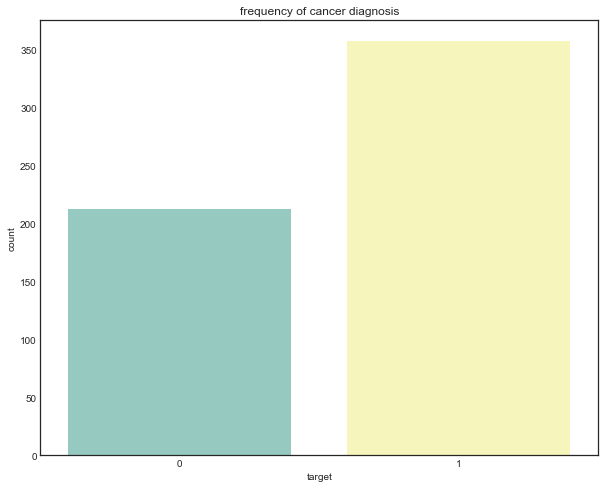

In [16]:
sns.set_style('white')
sns.set_context({'figure.figsize': (10,8)})
sns.countplot(cancer_df['target'],label = 'Count',palette = 'Set3')
plt.title('frequency of cancer diagnosis')
plt.show()

### Visualise distrubution of data by Histogram 

histogram divides the data into bins and count number of observations in each bin. From the shape , we'll be able to identify the nature of distribution

In [17]:
target_data = cancer_df.loc[:,['target']]
mean_data = cancer_df.ix[:,:10]
print(mean_data.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='object')


C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


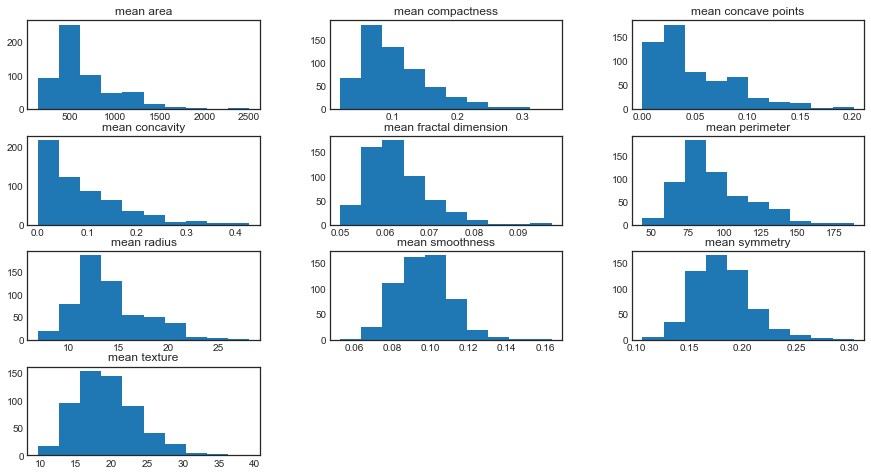

In [18]:
mean_hist = mean_data.hist(bins = 10, figsize=(15,8),grid = False,)

In [19]:
error_data = cancer_df.ix[:,10:20]
print(error_data.columns)

Index(['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error'],
      dtype='object')


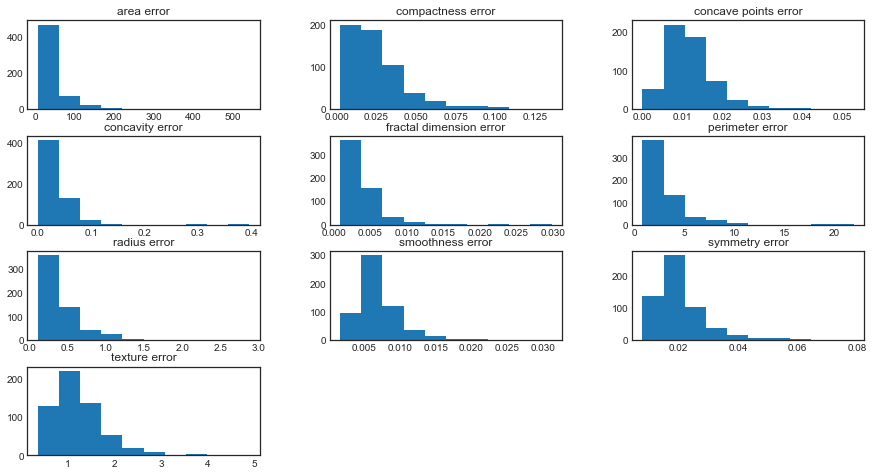

In [20]:
error_hist = error_data.hist(bins = 10, figsize=(15,8),grid = False,)

In [21]:
worst_data = cancer_df.ix[:,20:-1]
print(worst_data.columns)

Index(['worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


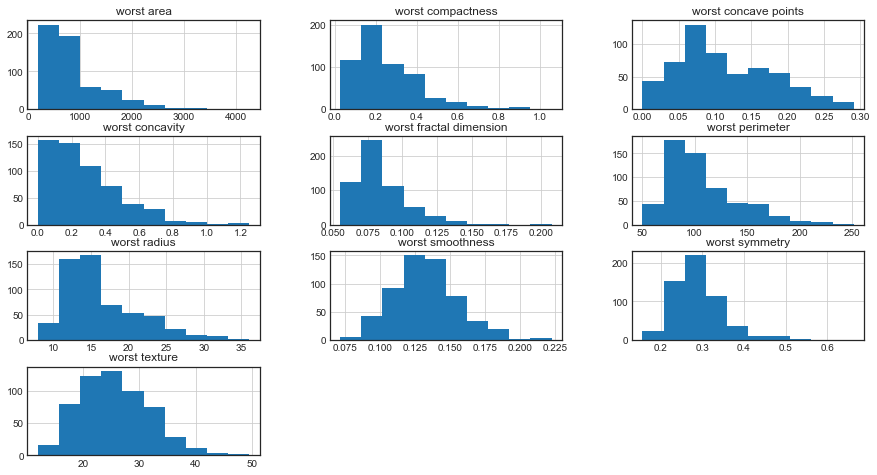

In [22]:
worst_hist = worst_data.hist(bins = 10, figsize=(15,8),grid = True,)

### Visualtion the distribuution of data by Density Plots

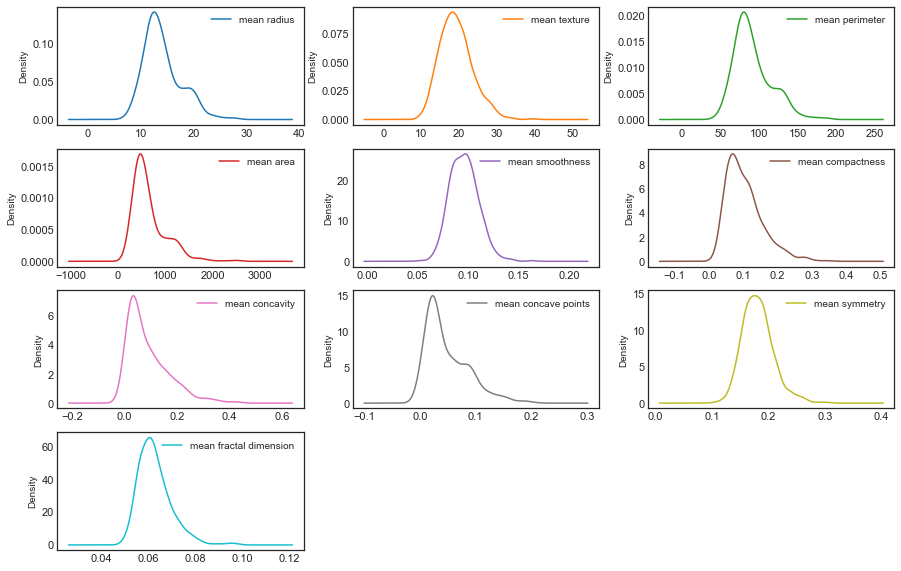

In [23]:
plt = mean_data.plot(kind = 'density',subplots = True,layout =(4,3),sharex = False, sharey = False, fontsize =11, figsize =(15,10))

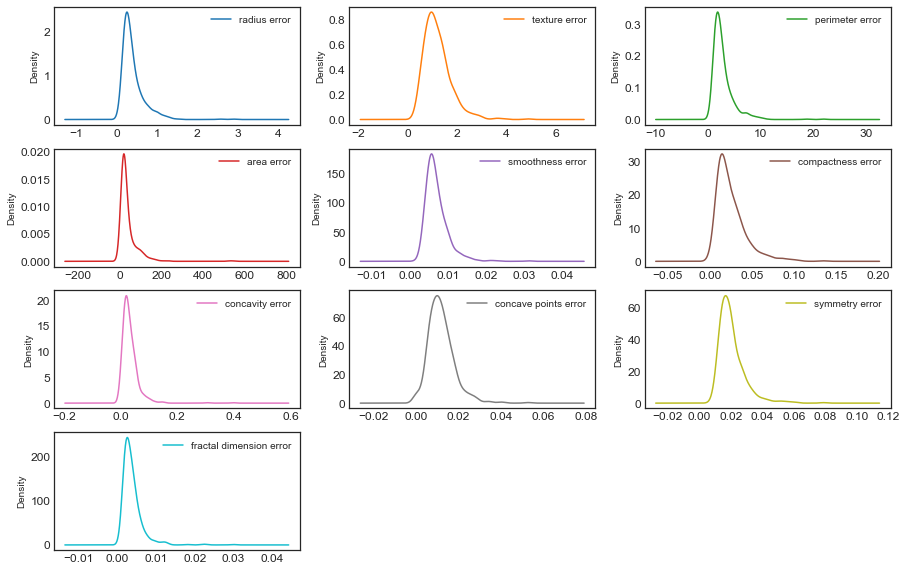

In [24]:
plt = error_data.plot(kind = 'density',subplots = True, layout =(4,3), fontsize =12, sharex=False,sharey = False, figsize=(15,10))

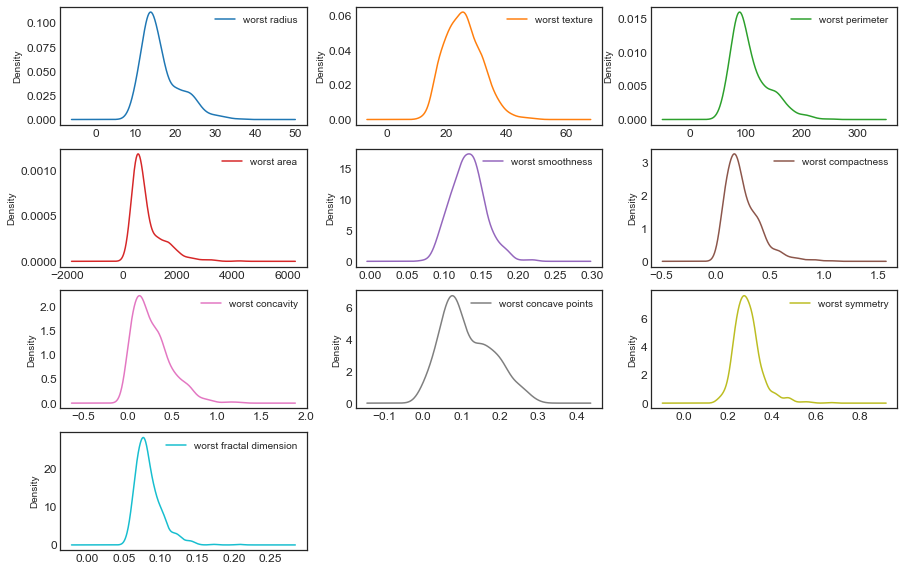

In [25]:
plt = worst_data.plot(kind ='density',subplots = True, layout =(4,3), fontsize =12, sharex=False,sharey = False, figsize=(15,10) )

### correlation matrix 

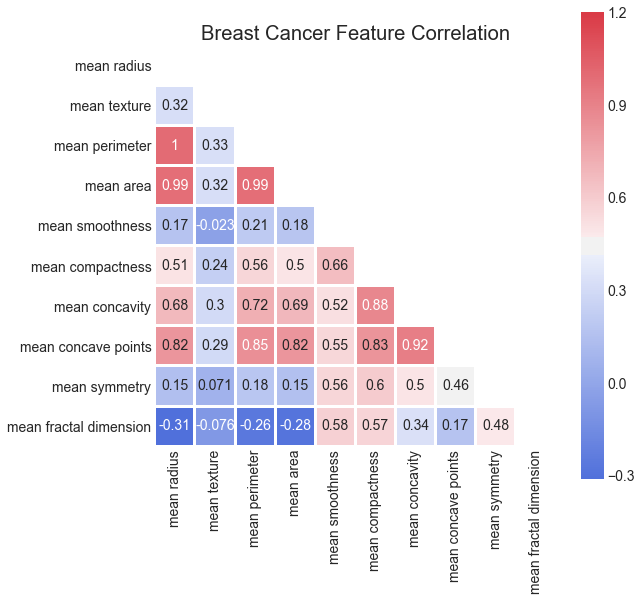

In [26]:
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

corr = mean_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

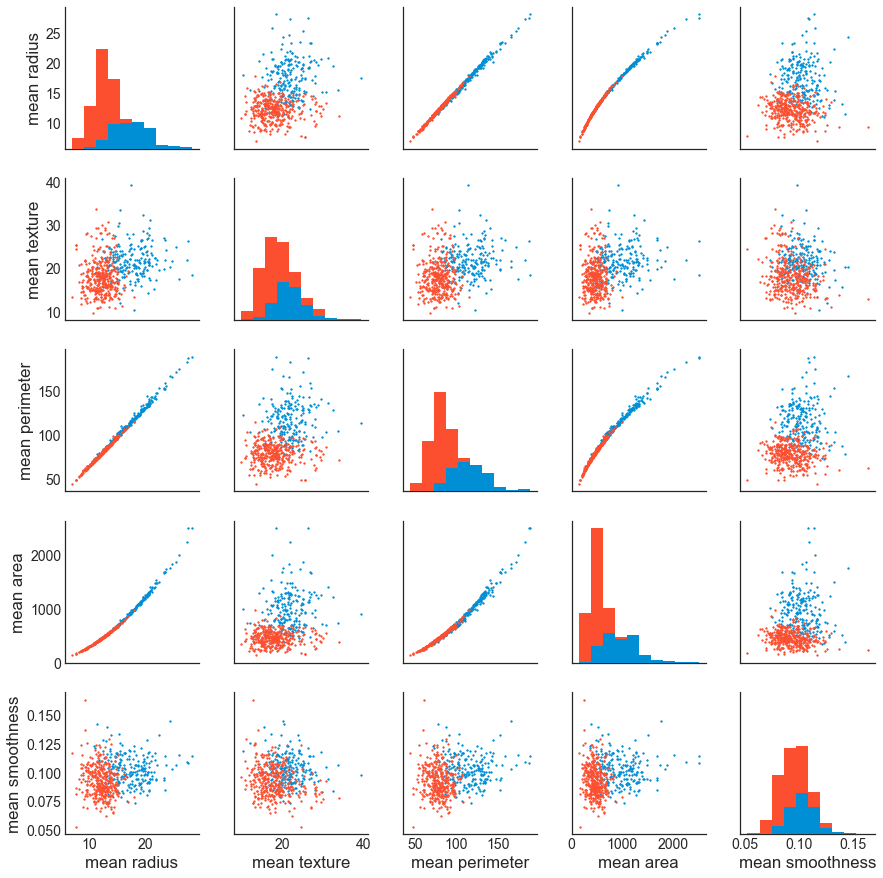

In [27]:
g=sns.PairGrid(cancer_df,vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness'],hue ='target')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s=3)

## Preprocessing

After observing the plots, we can easily think of the features which are affecting tumours the most and we can also check the correlation of one to another factor


Now, we can asses by training and testing the dataset

we are dividing datset as 70% for training set and 30% for testing purpose.

In [30]:
#x = cancer_df.iloc[:,:30]
#y = cancer_df.iloc[:,30:31]
array = cancer_df.values
x = array[:,:30]
y = array[:,30]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =5)

### Feature Standardisation

most machine leaning algorithms works well when features are on same scale .
Using  sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one :

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_x = scaler.fit_transform(x)

## Model Building 

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
prediction =clf.fit(x_train,y_train).predict(x_test)

C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
accuracy_score(y_test,prediction, normalize = True)

0.9824561403508771

In [34]:
#training usin standard features
x_train,x_test,y_train,y_test = train_test_split(scale_x,y,test_size =0.3,random_state =5)

In [35]:
clf = LogisticRegression()
prediction =clf.fit(x_train,y_train).predict(x_test)
accuracy_score(y_test,prediction, normalize = True)

C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9824561403508771

In [36]:
from sklearn.model_selection import cross_val_score
n_folds =8
cv_score = cross_val_score(LogisticRegression(), scale_x, y, cv=n_folds)
print(cv_score)

[0.98611111 0.97222222 0.98611111 0.97222222 0.98591549 0.95714286
 1.         0.98571429]


C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

In [37]:
from sklearn.model_selection import cross_val_predict
n_folds =12
prediction = cross_val_predict(LogisticRegression(), scale_x, y, cv=n_folds)
accuracy_score(y,prediction)

C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

0.9824253075571178

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
prediction = gnb.fit(x_train,y_train).predict(x_test)
accuracy_score(y_test,prediction,normalize =True)

0.9298245614035088

In [41]:
from sklearn.neighbors import KNeighborsClassifier

n = KNeighborsClassifier(n_neighbors=10)
prediction = n.fit(x_train,y_train).predict(x_test)
accuracy_score(y_test,prediction,normalize =True)

0.9649122807017544

### Support Vector Classifier

In [42]:
from sklearn.svm import SVC

svc = SVC(probability =True)
prediction = svc.fit(x_train,y_train).predict(x_test)
accuracy_score(y_test,prediction)

C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9824561403508771

Text(0,0.5,'Predictions')

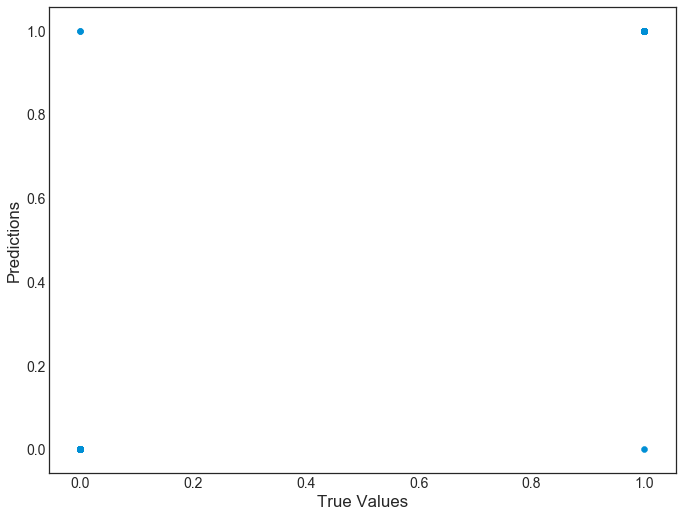

In [43]:
plt.scatter(y_test, prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')

Since using only test and traing set can lead to overfitting and may not predict well for a new set of records.
 So, we'll use cross validation set,

In [44]:
from sklearn.model_selection import cross_val_score
n_folds =6
cv_score = cross_val_score(SVC(), scale_x, y, cv=n_folds)
print(cv_score)

[0.97916667 0.9375     0.98947368 0.96808511 0.9893617  0.96808511]


C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\si

we can see that one of the scores is 0.9893617 which is greater than 0.9824561403508771 score of model without using cross_validation sets

In [45]:
from sklearn.model_selection import cross_val_predict
n_folds = 8
prediction = cross_val_predict(SVC(), scale_x, y, cv=n_folds)
accuracy_score(y,prediction)

C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pushkar\Anaconda3\anaconda_\lib\si

0.9736379613356766

##### after changing the values of n_fold we are still getting better predictions without using cross_validation sets.We can see that  in logistic regression using cross_validation is predicting with almost same accuracy as without using it and in SVC models cross_validation is reducing the accuracy of prediction .These two models are performing better than any others.